In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np

from mkidreadoutanalysis.mkidnoiseanalysis import plot_channel_fft, plot_psd, apply_lowpass_filter, compute_r
from mkidreadoutanalysis.resonator import *
from mkidreadoutanalysis.mkidnoiseanalysis import plot_psd
from mkidreadoutanalysis.mkidreadout import MKIDReadout
from mkidreadoutanalysis.optimal_filters.make_filters import Calculator
from mkidreadoutanalysis.optimal_filters.config import ConfigThing
import copy
%matplotlib inline

In [142]:
noise_data = np.zeros((3,2**19*500))
for i in range(0,500):
    data = np.load(f'/work/jpsmith/Gen3/Fridge_Tests/r_testing/data/white_fridge/10_18_23/wf_ellison3_6000_650GHz_dark{i:002d}.npz')
    noise_data[0,i*2**19:(i+1)*2**19] = data['phase_dark']
    noise_data[1,i*2**19:(i+1)*2**19] = data['iq_dark'].real
    noise_data[2,i*2**19:(i+1)*2**19] = data['iq_dark'].imag

dark_phase_data = -noise_data[0,:]

In [143]:
dark_data_crop = dark_phase_data[np.where(dark_phase_data != 0)]

In [2]:
red_data = np.zeros((3,2**19*500))
for i in range(0,500):
    data = np.load(f'/work/jpsmith/Gen3/Fridge_Tests/r_testing/data/white_fridge/10_18_23/wf_ellison3_6000_650GHz_red{i:002d}.npz')
    red_data[0,i*2**19:(i+1)*2**19] = data['phase_light']
    red_data[1,i*2**19:(i+1)*2**19] = data['iq_light'].real
    red_data[2,i*2**19:(i+1)*2**19] = data['iq_light'].imag

red_phase_data = -red_data[0,:]

red_readout = MKIDReadout()
red_readout.trigger(red_phase_data, fs = 1e6, threshold=-0.15, deadtime=30)
print((red_readout.trig>0).sum())


22381


In [3]:
red_phase_data[0:100]
red_data_iq = red_data.imag + red_data.real*1j

KeyboardInterrupt: 

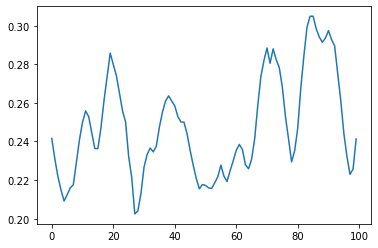

In [4]:
plt.plot(red_phase_data[0:100])
plt.plot(np.angle(red_data_iq[0:100]))

KeyboardInterrupt: 

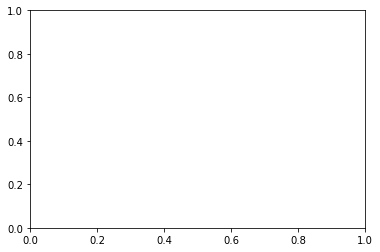

In [5]:
plt.plot(np.angle(red_data_iq[0:100]))

0.2465631406162123


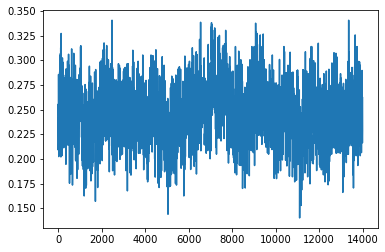

In [20]:
plt.plot(red_phase_data[0:14000])
red_phase_dark_mean = red_phase_data[0:14000].mean()
print(red_phase_dark_mean)

In [21]:
red_readout.record_energies(red_phase_data);

In [22]:
blue_data = np.zeros((3,2**19*500))
for i in range(0,500):
    data = np.load(f'/work/jpsmith/Gen3/Fridge_Tests/r_testing/data/white_fridge/10_18_23/wf_ellison3_6000_650GHz_blue{i:002d}.npz')
    blue_data[0,i*2**19:(i+1)*2**19] = data['phase_light']
    blue_data[1,i*2**19:(i+1)*2**19] = data['iq_light'].real
    blue_data[2,i*2**19:(i+1)*2**19] = data['iq_light'].imag

blue_phase_data = -blue_data[0,:]

blue_readout = MKIDReadout()
blue_readout.trigger(blue_phase_data, fs = 1e6, threshold=-0.15, deadtime=30)
print((blue_readout.trig>0).sum())

23551


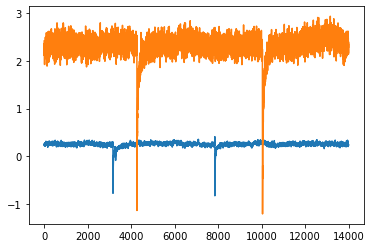

In [199]:
plt.plot(blue_phase_data[57000:71000])
plt.plot(np.angle(blue_data[2,57000:71000]+1j*blue_data[1,57000:71000]))

0.2554050852556361


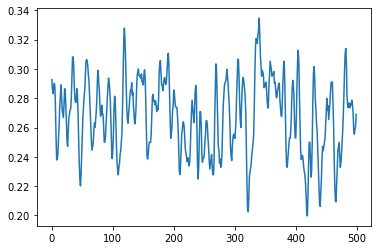

In [23]:
plt.plot(blue_phase_data[0:500])
blue_phase_dark_mean = blue_phase_data[0:14000].mean()
print(blue_phase_dark_mean)

In [24]:
blue_readout.record_energies(blue_phase_data);

In [25]:
ir_data = np.zeros((3,2**19*500))
for i in range(0,500):
    data = np.load(f'/work/jpsmith/Gen3/Fridge_Tests/r_testing/data/white_fridge/10_18_23/wf_ellison3_6000_650GHz_ir{i:002d}.npz')
    ir_data[0,i*2**19:(i+1)*2**19] = data['phase_light']
    ir_data[1,i*2**19:(i+1)*2**19] = data['iq_light'].real
    ir_data[2,i*2**19:(i+1)*2**19] = data['iq_light'].imag

ir_phase_data = -ir_data[0,:]

ir_readout = MKIDReadout()
ir_readout.trigger(ir_phase_data, fs = 1e6, threshold=-0.15, deadtime=30)
print((ir_readout.trig>0).sum())

31178


0.27397836455667507


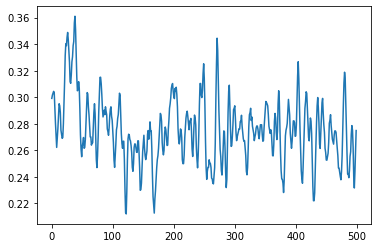

In [26]:
plt.plot(ir_phase_data[0:500])
ir_phase_dark_mean = ir_phase_data[0:14000].mean()
print(ir_phase_dark_mean)

In [27]:
ir_readout.record_energies(ir_phase_data);


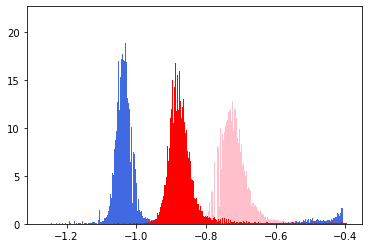

In [33]:
plt.figure()
plt.hist(ir_readout.photon_energies-ir_phase_dark_mean, bins='auto', density=True, color='pink');
plt.hist(blue_readout.photon_energies-blue_phase_dark_mean, bins='auto', density=True, color='royalblue');
plt.hist(red_readout.photon_energies-red_phase_dark_mean, bins='auto', density=True, color='red');

In [34]:
ir=ir_readout.photon_energies-ir_phase_dark_mean
blu=blue_readout.photon_energies-blue_phase_dark_mean
blu=blu[blu<-.9]
red=red_readout.photon_energies-red_phase_dark_mean
ir.mean(),ir.std(),blu.mean(),blu.std(),red.mean(),red.std()
irl=978.0
blul=405.9
redl=663.1
l=np.array([blul,redl,irl])
p=np.array([blu.mean(),red.mean(),ir.mean()])
fw=2*np.sqrt(2*np.log(2))*np.array([blu.std(),red.std(),ir.std()])
dldp=np.diff(l)/np.diff(p)
dl=dldp.mean()*fw
dldp,dldp.mean(), l, p, dl, l/dl

(array([1504.95636372, 2139.72074519]),
 1822.3385544552827,
 array([405.9, 663.1, 978. ]),
 array([-1.03564258, -0.86474061, -0.71757188]),
 array([121.30623651, 277.22684026, 223.56699848]),
 array([3.34607693, 2.39190404, 4.37452758]))

In [35]:
ir=ir_readout.photon_energies-ir_phase_dark_mean
blu=blue_readout.photon_energies-blue_phase_dark_mean
red=red_readout.photon_energies-red_phase_dark_mean
ir.mean(),ir.std(),blu.mean(),blu.std(),red.mean(),red.std()

(-0.7175718770157592,
 0.052097982882860196,
 -0.98971554979207,
 0.15346872298200853,
 -0.8647406142017101,
 0.06460237547032432)

array([<AxesSubplot:title={'center':'successful'}, xlabel='frequency [Hz]', ylabel='PSD [dBc / Hz]'>,
       <AxesSubplot:title={'center':'successful'}, xlabel='time [$\\mu$s]', ylabel='filter coefficient [radians]'>,
       <AxesSubplot:title={'center':'successful'}, xlabel='time [$\\mu$s]', ylabel='template [arb.]'>,
       <AxesSubplot:title={'center':'successful'}, xlabel='time [$\\mu$s]', ylabel='template [arb.]'>],
      dtype=object)

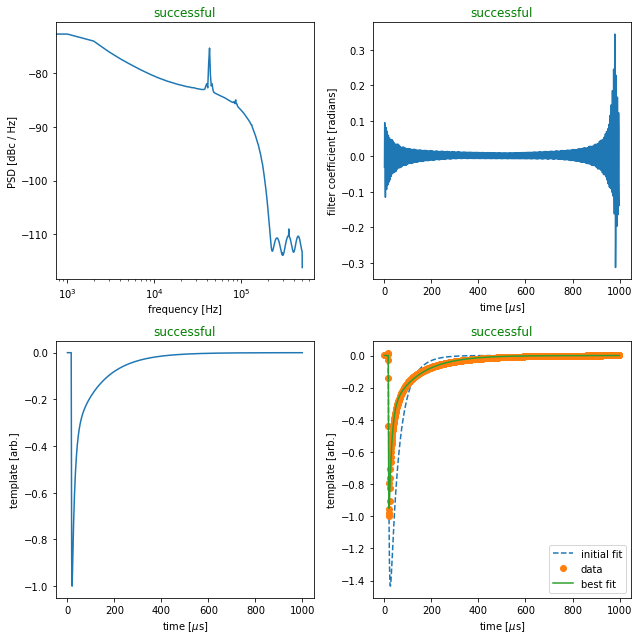

In [155]:
cfg=ConfigThing()
cfg.registerfromkvlist((('dt', 1e-6),
('fit', True),
('summary_plot', True),
('pulses.unwrap', False),
('pulses.fallback_template', 'default'),
('pulses.ntemplate', 1000), # need to set this larger to calculate covariance matrix in the time domain "accurately" for the number of selected filter coefficients
('pulses.offset', 20),
('pulses.threshold', 6),
('pulses.separation', 40),
('pulses.min_pulses', 1000),
('noise.nwindow', 1000), #1000
('noise.isolation', 100),
('noise.max_windows', 2000), # maximum number of nwindows of samples needed before moving on [int]
('noise.max_noise', 5000), #2000
('template.percent', 80),
('template.cutoff', .2),
('template.min_tau', 5),
('template.max_tau', 100),
('template.fit', 'triple_exponential'),
('filter.filter_type', 'wiener'),
('filter.nfilter', 1000), # for messing around this should be closer to 1000 and ntemplate should be increased to be 5-10x nfilter
                        # need to make sure filter is periodic and this gets hard when the filter is short
('filter.normalize', True)), namespace='')

ofc = Calculator(phase=ir_phase_data, noise_data=dark_phase_data, config=cfg, name='simulated')

ofc.calculate(clear=False)

ofc.plot()
# ofc.result["filter"]
# probably need 2 or 3 thousand pulses to average to get rid of noise if you do't want to fit the template

In [166]:
ir_filtered = np.convolve(ir_phase_data, ofc.result["filter"], mode='same')
noise_filtered = np.convolve(dark_phase_data, ofc.result["filter"], mode='same')

In [160]:
ir_filtered_readout = MKIDReadout()
ir_filtered_readout.trigger(ir_filtered, fs = 1e6, threshold=0.4, deadtime=30)
print((ir_filtered_readout.trig>0).sum())

32777


In [161]:
ir_filtered_readout.record_energies(ir_filtered);

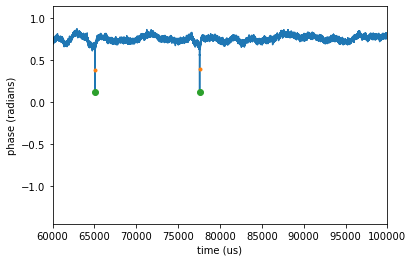

In [162]:
ir_filtered_readout.plot_triggers(ir_filtered, fs=1e6, energies=True)
plt.xlim([60000,100000]);

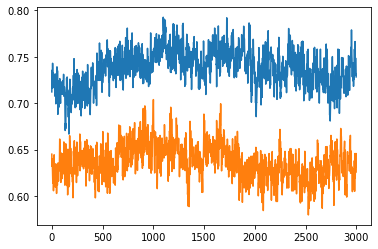

In [167]:
plt.plot(ir_filtered[12000:15000])
plt.plot(noise_filtered[12000:15000])
ir_filtered_dark_mean = ir_filtered[12000:15000].mean()

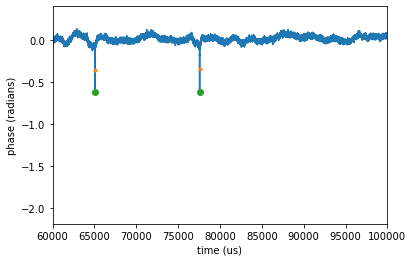

In [168]:
ir_filtered_readout.plot_triggers(ir_filtered-ir_filtered_dark_mean, fs=1e6, energies=True)
plt.xlim([60000,100000]);

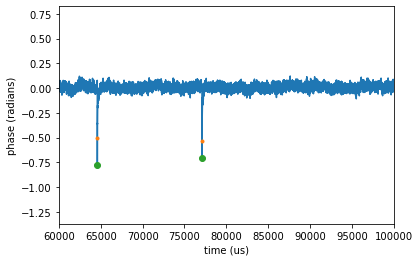

In [113]:
ir_readout.plot_triggers(ir_phase_data-ir_phase_dark_mean, fs=1e6, energies=True)
plt.xlim([60000,100000]);

(-1.5, 0.0)

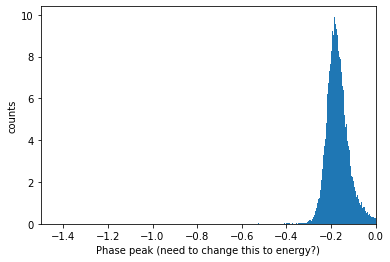

In [114]:
ir_filtered_readout.plot_energies()
plt.xlim(-1.5,0)

(-1.5, 0.0)

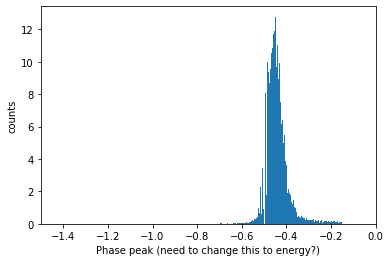

In [115]:
ir_readout.plot_energies()
plt.xlim(-1.5,0)

array([<AxesSubplot:title={'center':'successful'}, xlabel='frequency [Hz]', ylabel='PSD [dBc / Hz]'>,
       <AxesSubplot:title={'center':'successful'}, xlabel='time [$\\mu$s]', ylabel='filter coefficient [radians]'>,
       <AxesSubplot:title={'center':'successful'}, xlabel='time [$\\mu$s]', ylabel='template [arb.]'>,
       <AxesSubplot:title={'center':'successful'}, xlabel='time [$\\mu$s]', ylabel='template [arb.]'>],
      dtype=object)

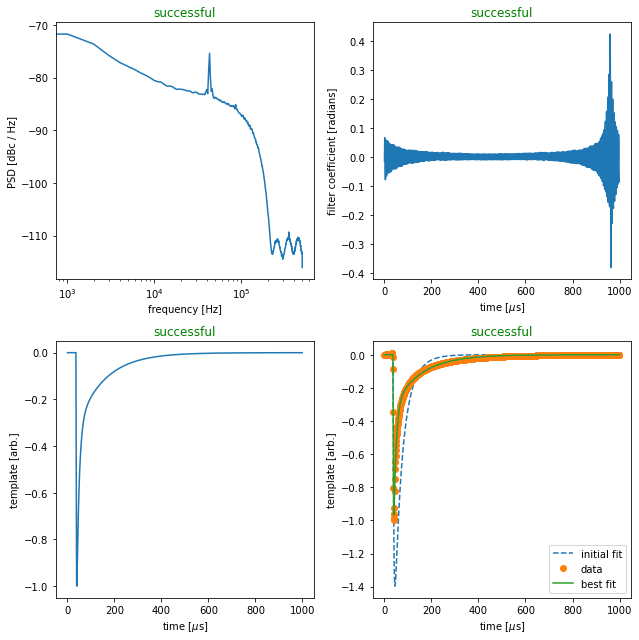

In [80]:
cfg=ConfigThing()
cfg.registerfromkvlist((('dt', 1e-6),
('fit', True),
('summary_plot', True),
('pulses.unwrap', False),
('pulses.fallback_template', 'default'),
('pulses.ntemplate', 1000), # need to set this larger to calculate covariance matrix in the time domain "accurately" for the number of selected filter coefficients
('pulses.offset', 40),
('pulses.threshold', 6),
('pulses.separation', 40),
('pulses.min_pulses', 1000),
('noise.nwindow', 1000), #1000
('noise.isolation', 100),
('noise.max_windows', 2000), # maximum number of nwindows of samples needed before moving on [int]
('noise.max_noise', 5000), #2000
('template.percent', 80),
('template.cutoff', .2),
('template.min_tau', 5),
('template.max_tau', 100),
('template.fit', 'triple_exponential'),
('filter.filter_type', 'wiener'),
('filter.nfilter', 1000), # for messing around this should be closer to 1000 and ntemplate should be increased to be 5-10x nfilter
                        # need to make sure filter is periodic and this gets hard when the filter is short
('filter.normalize', True)), namespace='')

ofc = Calculator(red_phase_data, config=cfg, name='simulated')

ofc.calculate(clear=False)

ofc.plot()

In [81]:
red_filtered = np.convolve(red_phase_data, ofc.result["filter"], mode='same')

In [83]:
red_filtered_readout = MKIDReadout()
red_filtered_readout.trigger(red_filtered, fs = 1e6, threshold=0.1, deadtime=30)
print((red_filtered_readout.trig>0).sum())

22363


In [84]:
red_filtered_readout.record_energies(red_filtered);

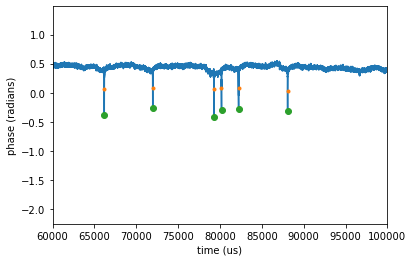

In [85]:
red_filtered_readout.plot_triggers(red_filtered, fs=1e6, energies=True)
plt.xlim([60000,100000]);

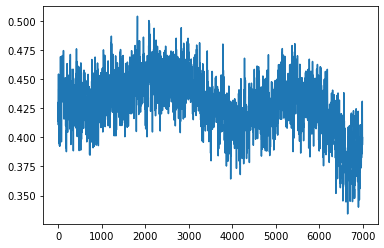

In [94]:
plt.plot(red_filtered[12000:19000])
red_filtered_dark_mean = red_filtered[12000:19000].mean()

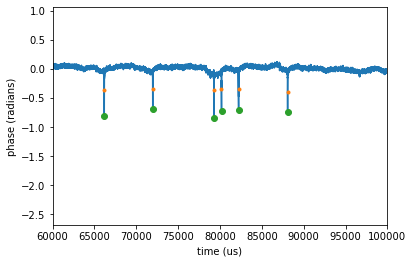

In [95]:
red_filtered_readout.plot_triggers(red_filtered-red_filtered_dark_mean, fs=1e6, energies=True)
plt.xlim([60000,100000]);

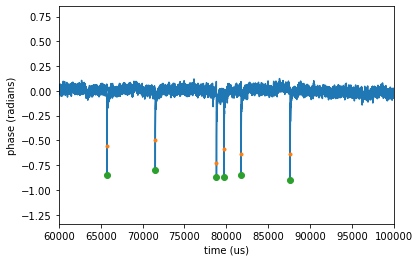

In [96]:
red_readout.plot_triggers(red_phase_data-red_phase_dark_mean, fs=1e6, energies=True)
plt.xlim([60000,100000]);

(0.0, 16.0)

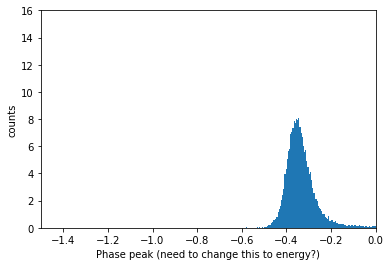

In [202]:
red_filtered_readout.plot_energies()
plt.xlim(-1.5,0)
plt.ylim([0,16])

(0.0, 16.0)

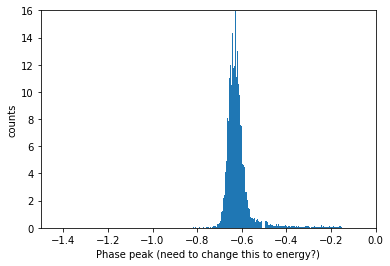

In [203]:
red_readout.plot_energies()
plt.xlim(-1.5,0)
plt.ylim([0,16])

array([<AxesSubplot:title={'center':'successful'}, xlabel='frequency [Hz]', ylabel='PSD [dBc / Hz]'>,
       <AxesSubplot:title={'center':'successful'}, xlabel='time [$\\mu$s]', ylabel='filter coefficient [radians]'>,
       <AxesSubplot:title={'center':'successful'}, xlabel='time [$\\mu$s]', ylabel='template [arb.]'>,
       <AxesSubplot:title={'center':'successful'}, xlabel='time [$\\mu$s]', ylabel='template [arb.]'>],
      dtype=object)

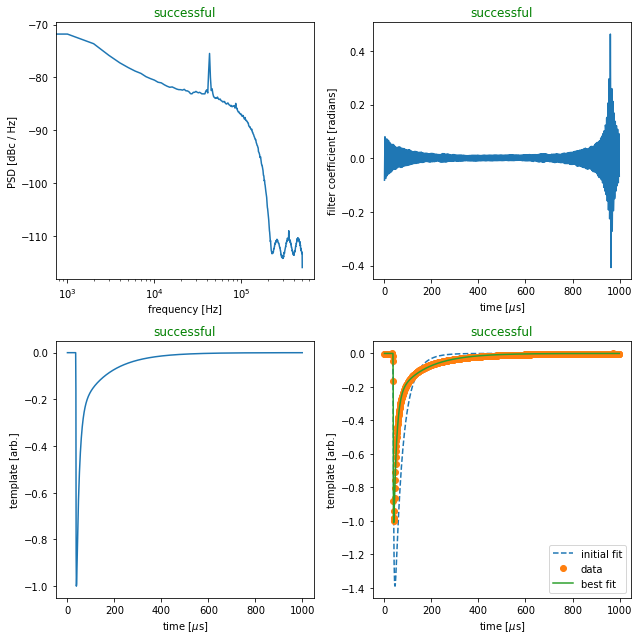

In [116]:
cfg=ConfigThing()
cfg.registerfromkvlist((('dt', 1e-6),
('fit', True),
('summary_plot', True),
('pulses.unwrap', False),
('pulses.fallback_template', 'default'),
('pulses.ntemplate', 1000), # need to set this larger to calculate covariance matrix in the time domain "accurately" for the number of selected filter coefficients
('pulses.offset', 40),
('pulses.threshold', 6),
('pulses.separation', 40),
('pulses.min_pulses', 1000),
('noise.nwindow', 1000), #1000
('noise.isolation', 100),
('noise.max_windows', 2000), # maximum number of nwindows of samples needed before moving on [int]
('noise.max_noise', 5000), #2000
('template.percent', 80),
('template.cutoff', .2),
('template.min_tau', 5),
('template.max_tau', 100),
('template.fit', 'triple_exponential'),
('filter.filter_type', 'wiener'),
('filter.nfilter', 1000), # for messing around this should be closer to 1000 and ntemplate should be increased to be 5-10x nfilter
                        # need to make sure filter is periodic and this gets hard when the filter is short
('filter.normalize', True)), namespace='')

ofc = Calculator(blue_phase_data, config=cfg, name='simulated')

ofc.calculate(clear=False)

ofc.plot()

In [117]:
blue_filtered = np.convolve(blue_phase_data, ofc.result["filter"], mode='same')

In [121]:
blue_filtered_readout = MKIDReadout()
blue_filtered_readout.trigger(blue_filtered, fs = 1e6, threshold=-0.1, deadtime=30)
print((blue_filtered_readout.trig>0).sum())

21884


In [122]:
blue_filtered_readout.record_energies(blue_filtered);

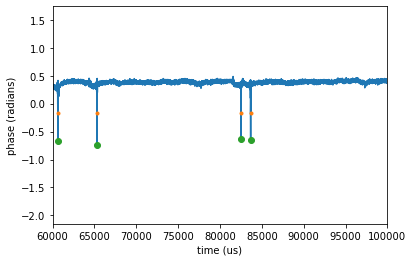

In [123]:
blue_filtered_readout.plot_triggers(blue_filtered, fs=1e6, energies=True)
plt.xlim([60000,100000]);

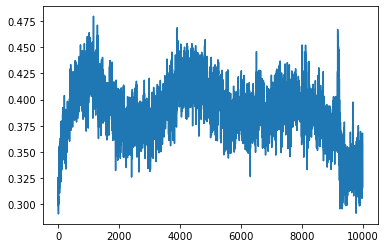

In [134]:
plt.plot(blue_filtered[11000:21000])
blue_filtered_dark_mean = blue_filtered[11000:21000].mean()

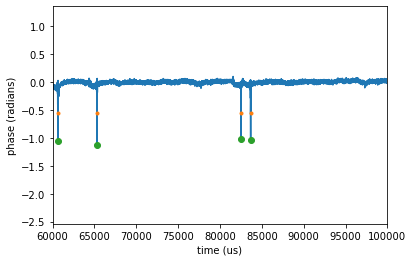

In [135]:
blue_filtered_readout.plot_triggers(blue_filtered-blue_filtered_dark_mean, fs=1e6, energies=True)
plt.xlim([60000,100000]);

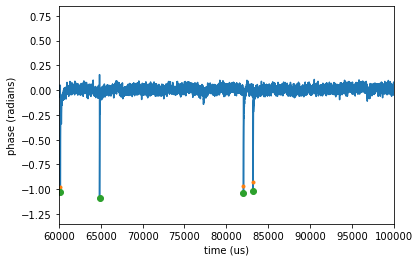

In [136]:
blue_readout.plot_triggers(blue_phase_data-blue_phase_dark_mean, fs=1e6, energies=True)
plt.xlim([60000,100000]);

(-1.5, 0.0)

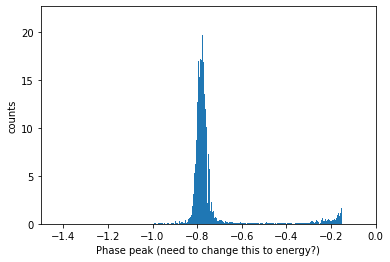

In [138]:
blue_readout.plot_energies()
plt.xlim(-1.5,0)

In [201]:
fname = '/work/jpsmith/Gen3/Fridge_Tests/r_testing/data/white_fridge/10_18_23/wf_ellison3_6000_650GHz.npz'
np.savez(fname,dark_phase=-noise_data[0,:], dark_iq=noise_data[2,:]+noise_data[1,:]*1j, 
        red_phase=-red_data[0,:], red_iq = red_data[2,:]+red_data[1,:]*1j,
        blue_phase=-blue_data[0,:], blue_iq = blue_data[2,:]+blue_data[1,:]*1j,
        ir_phase=-ir_data[0,:], ir_iq = ir_data[2,:]+ir_data[1,:]*1j)

In [ ]:
blue_data[2,57000:71000]+1j*blue_data[1,57000:71000])

In [3]:
dark_data = np.zeros((3,2**19*50))
for i in range(0,50):
    data = np.load(f'/Users/jpsmith/jenny_r_data/wf_ellison3_6000_760GHz_dark2{i:02d}.npz')
    dark_data[0,i*2**19:(i+1)*2**19] = data['phase_dark']
    dark_data[1,i*2**19:(i+1)*2**19] = data['iq_dark'].real
    dark_data[2,i*2**19:(i+1)*2**19] = data['iq_dark'].imag

In [4]:
phase_dark = dark_data[0,:]

In [5]:
phase_data = -blue_data[0,:]

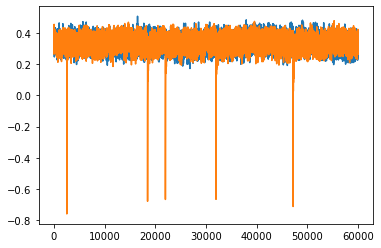

In [6]:
plt.plot(phase_dark[40000:100000])
plt.plot(phase_data[40000:100000])

In [7]:
(phase_data<-0.2).sum()

18475

array([<AxesSubplot:title={'center':'successful'}, xlabel='frequency [Hz]', ylabel='PSD [dBc / Hz]'>,
       <AxesSubplot:title={'center':'successful'}, xlabel='time [$\\mu$s]', ylabel='filter coefficient [radians]'>,
       <AxesSubplot:title={'center':'successful'}, xlabel='time [$\\mu$s]', ylabel='template [arb.]'>,
       <AxesSubplot:title={'center':'successful'}, xlabel='time [$\\mu$s]', ylabel='template [arb.]'>],
      dtype=object)

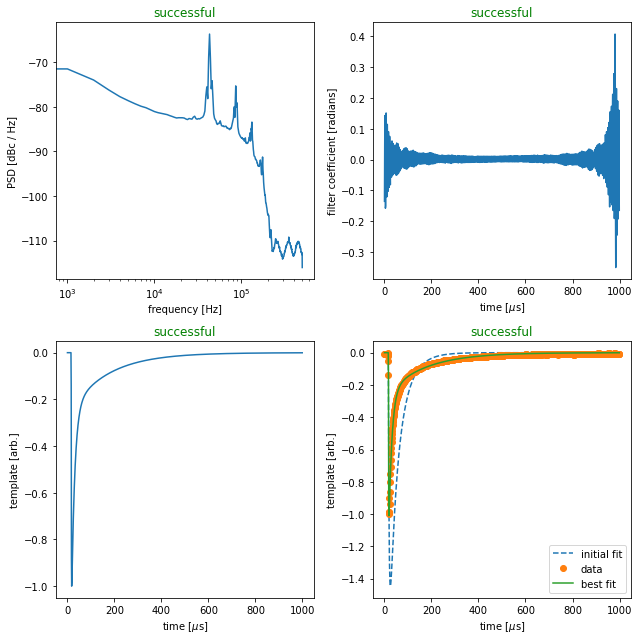

In [8]:
cfg=ConfigThing()
cfg.registerfromkvlist((('dt', 1e-6),
('fit', True),
('summary_plot', True),
('pulses.unwrap', False),
('pulses.fallback_template', 'default'),
('pulses.ntemplate', 1000), # need to set this larger to calculate covariance matrix in the time domain "accurately" for the number of selected filter coefficients
('pulses.offset', 20),
('pulses.threshold', 6),
('pulses.separation', 40),
('pulses.min_pulses', 1000),
('noise.nwindow', 1000), #1000
('noise.isolation', 100),
('noise.max_windows', 2000), # maximum number of nwindows of samples needed before moving on [int]
('noise.max_noise', 5000), #2000
('template.percent', 80),
('template.cutoff', .2),
('template.min_tau', 5),
('template.max_tau', 100),
('template.fit', 'triple_exponential'),
('filter.filter_type', 'wiener'),
('filter.nfilter', 1000), # for messing around this should be closer to 1000 and ntemplate should be increased to be 5-10x nfilter
                        # need to make sure filter is periodic and this gets hard when the filter is short
('filter.normalize', True)), namespace='')

ofc = Calculator(phase_data, config=cfg, name='simulated')

ofc.calculate(clear=False)

ofc.plot()
# ofc.result["filter"]
# probably need 2 or 3 thousand pulses to average to get rid of noise if you do't want to fit the template

# Apply Optimal Filter

In [9]:
result = np.convolve(phase_data, ofc.result["filter"], mode='same')

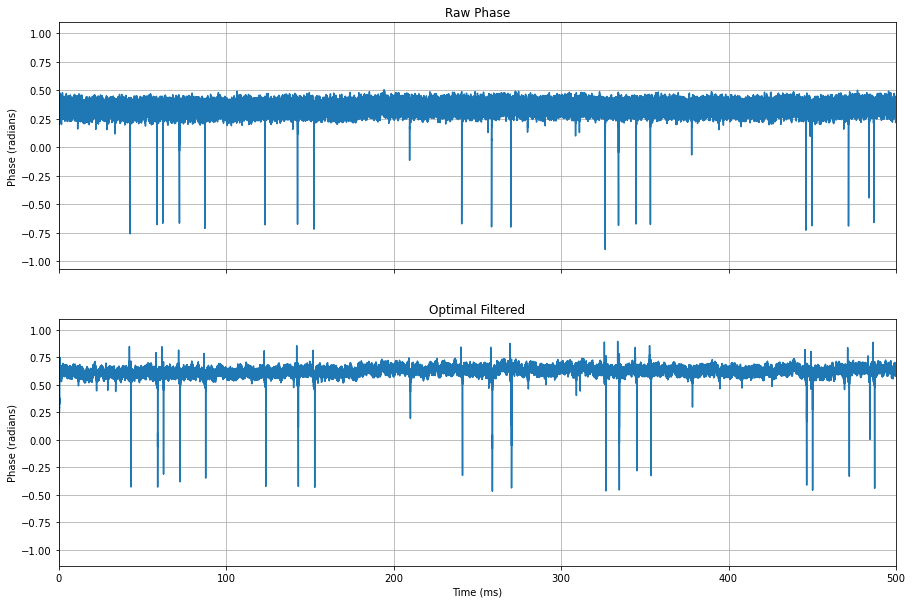

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(15,10))

time = (np.arange(result.shape[0])*1/(1e6))*1e3
ax1.plot(time, phase_data)
#plt.plot(time[readout.trig], result[readout.trig],"o")
ax1.set_xlim([0,500])
ax1.grid()
ax1.set_title('Raw Phase')
ax1.set_ylabel('Phase (radians)')
ax2.plot(time, result)
ax2.set_title('Optimal Filtered')
ax2.set_ylabel('Phase (radians)')
ax2.set_xlabel('Time (ms)')
ax2.grid()


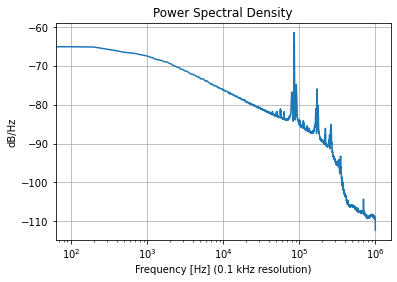

In [11]:
plot_psd(phase_data, fres=1e2)

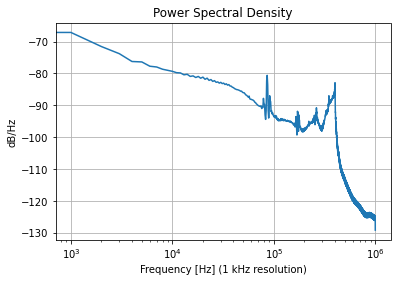

In [12]:
plot_psd(result)

In [35]:
readout = MKIDReadout()
readout_raw = MKIDReadout()
readout.trigger(result, fs = 1e6, threshold=-0.15, deadtime=30)
readout_raw.trigger(phase_data, fs = 1e6, threshold=-0.5, deadtime=25)


array([False, False, False, ..., False, False, False])

In [36]:
(readout_raw.trig>0).sum()

1369

In [37]:
readout.record_energies(result)
readout_raw.record_energies(phase_data)

array([-0.76094852, -0.67976928, -0.66798914, ..., -0.70229194,
       -0.71175268, -0.67543565])

In [38]:
#readout.plot_triggers(result, fs=1e6, energies=True)

(55000.0, 65000.0)

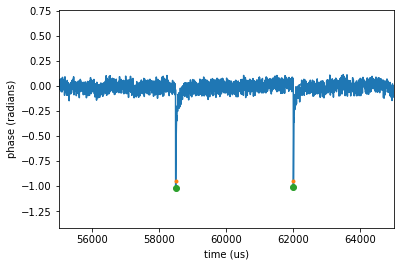

In [39]:
readout_raw.plot_triggers(phase_data-phase_dark.mean(), fs=1e6, energies=True)
plt.xlim([55000,65000])

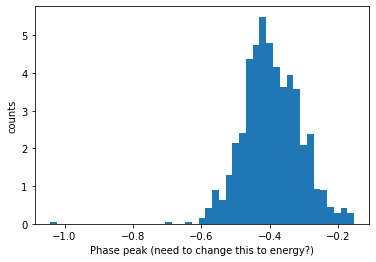

In [40]:
readout.plot_energies()

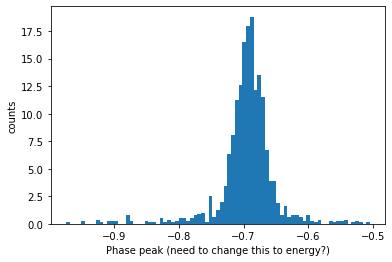

In [41]:
readout_raw.plot_energies()

3.974284403048757

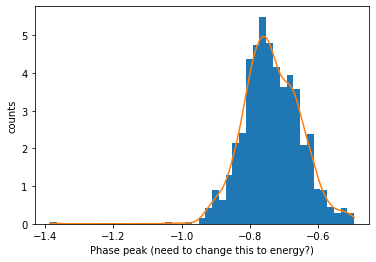

In [43]:
compute_r(readout.photon_energies-phase_dark.mean(), plot=True)


In [44]:
readout.photon_energies.shape

(1360,)

21.03317120852546

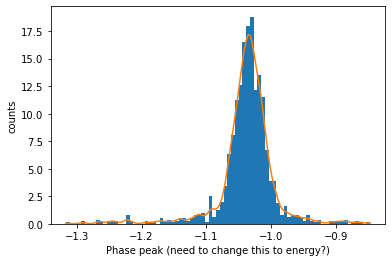

In [42]:
compute_r(readout_raw.photon_energies-phase_dark.mean(), plot=True)

In [104]:
readout_raw.photon_energies.shape

(1368,)

In [79]:
readout_raw.photon_energies.mean()

-0.6949775813884922

In [76]:
readout.photon_energies.shape

(1360,)